### Improving Sample for Test Data: a stricter polarity threholds 

Here we create a new verion of the sample for the test data that tries to improve the iter-rater reliabiliy agreements on the sentiment of the answers/texts, by only keeping those sentences that, in each answer/text, have a polarity score that meets a stricter threshold.

Workflow:

1. Calculate polarity score for each senence in each text using Vader
2. Eliminate all those scores that do not meet the (stricter) threshold for positivity/nagativity
3. Calculate mean polarity score for the text

### 1. Imports and Set Up

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

In [2]:
#### Set up working directory
cwd = os.chdir('/Users/alessia/Documents/DataScience/NLP_Project/Outputs')

In [3]:
pd.set_option('display.max_colwidth', -1)

### 2. Get Data

In [4]:
# Read in data using literal_eval and converers
testdata_sample = pd.read_csv("sa_q1_sample_testdata.csv", converters=dict(VDR_SA_scores_sents=literal_eval, 
                                                                           TB_SA_score_sents = literal_eval, 
                                                                           subjty_score_sents = literal_eval))

In [5]:
# Fix the columns containing a mixture of strings and floats (NaN) due to pd.to_csv...

testdata_sample['only_subj_VDR_scores'] = testdata_sample['only_subj_VDR_scores'].map(lambda x: literal_eval(x) if isinstance(x, str) else x)

testdata_sample['only_subj_TB_scores'] = testdata_sample['only_subj_TB_scores'].map(lambda x: literal_eval(x) if isinstance(x, str) else x)

### 3. Import basic NLP functions

In [6]:
cwd = os.chdir('/Users/alessia/Documents/DataScience/textconsultations/')

In [7]:
os.listdir()

['nlpfunctions', 'tutorial', 'README.md', '.git']

In [8]:
os.listdir('nlpfunctions');

In [9]:
import nlpfunctions.basic_NLP_functions as b_nlp

/Users/alessia/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### 4. Calculate stricter mean polarity score for each text

In [10]:
testdata_sample.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Respondent ID', 'Q1_census_methods',
       'Are you responding on behalf of an organisation, or as an individual?Response',
       'PublicSector', 'PrivateSector', 'OtherSectors', 'sent_tok_text',
       'VDR_SA_scores_sents', 'mean_VDR_SA_scores', 'VDR_polarity',
       'TB_SA_score_sents', 'TB_mean_SA_score', 'TB_polarity',
       'subjty_score_sents', 'Q1_only_subj_sents', 'only_subj_VDR_scores',
       'only_subj_mean_VDR_score', 'only_subj_VDR_polarity',
       'only_subj_TB_scores', 'only_subj_mean_TB_score',
       'only_subj_TB_polarity'],
      dtype='object')

Sentence-tokenise texts

In [11]:
testdata_sample['sent_tok_text'] = testdata_sample['Q1_census_methods'].apply(lambda x: b_nlp.sent_tokenise_df(x))

#### Remove (i.e., assign NaN) to all those VDR polarity scores that do not meet the threshold. 
I.e., -0.3 <= score <= 0.3 are removed.

In [12]:
testdata_sample['strict_VDR_SA_scores_sents'] = testdata_sample['VDR_SA_scores_sents'].apply(lambda x: b_nlp.get_sentiment_stricter_threshold_df(x, polarity_threshold = 0.3))

In [13]:
testdata_sample[['strict_VDR_SA_scores_sents', 'VDR_polarity']];

#### Re-calculate text's mean polarity score using VADER

In [15]:
testdata_sample['mean_strict_VDR_score'] = testdata_sample['strict_VDR_SA_scores_sents'].apply(lambda x: np.nanmean(x))

/Users/alessia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [16]:
testdata_sample['strict_VDR_polarity'] = testdata_sample['mean_strict_VDR_score'].apply(lambda x: 'pos' if x > 0 else 'neg' if x < 0 else "")

In [17]:
# Checks

testdata_sample[['VDR_SA_scores_sents', 'mean_VDR_SA_scores', 'VDR_polarity',
                 'strict_VDR_SA_scores_sents', 'mean_strict_VDR_score', 'strict_VDR_polarity']][:4]

,VDR_SA_scores_sents,mean_VDR_SA_scores,VDR_polarity,strict_VDR_SA_scores_sents,mean_strict_VDR_score,strict_VDR_polarity
0,"[0.6369, 0.6597, 0.8402, 0.0, 0.2263, 0.6486, 0.0, 0.4939, 0.09, 0.0772, 0.0, 0.6597, 0.4754, 0.8074, 0.6124, -0.7269, 0.25, -0.6249, -0.624, -0.101, -0.1531, 0.3182, 0.0, -0.25, 0.0, 0.0, 0.34, 0.7076, -0.34, 0.0, 0.0, -0.2732, 0.6597, 0.0, 0.0, 0.8126, 0.6597, 0.6808, 0.0772, 0.4404, 0.1548, 0.0516, 0.5859]",0.206351,pos,"[0.6369, 0.6597, 0.8402, nan, nan, 0.6486, nan, 0.4939, nan, nan, nan, 0.6597, 0.4754, 0.8074, 0.6124, -0.7269, nan, -0.6249, -0.624, nan, nan, 0.3182, nan, nan, nan, nan, 0.34, 0.7076, -0.34, nan, nan, nan, 0.6597, nan, nan, 0.8126, 0.6597, 0.6808, nan, 0.4404, nan, nan, 0.5859]",0.396514,pos
1,"[0.3612, 0.0]",0.180600,pos,"[0.3612, nan]",0.361200,pos
2,"[0.0, 0.0258, 0.4927, 0.0, 0.0, 0.2263, 0.2263, 0.0]",0.121387,pos,"[nan, nan, 0.4927, nan, nan, nan, nan, nan]",0.492700,pos
3,"[0.4404, 0.4215, 0.3818, -0.3182]",0.231375,pos,"[0.4404, 0.4215, 0.3818, -0.3182]",0.231375,pos


#### From each text, remove the sentences whose polarity score does not meet the stricter threshold

In [19]:
testdata_sample['only_strict_polarity_sents'] = testdata_sample['sent_tok_text'].apply(lambda x: b_nlp.keep_only_strict_polarity_sents_df(x))

In [24]:
# Check
testdata_sample[['sent_tok_text', 'VDR_SA_scores_sents',
                 'only_strict_polarity_sents', 
                 'strict_VDR_SA_scores_sents', 'mean_strict_VDR_score', 'strict_VDR_polarity']][1:5];

# Some negative sentences are not picked up correctly by VADER...

#### Re-Calculate TextBlob polarity score on strict polarity texts

In [25]:
testdata_sample['strict_sents_TB_scores'] = testdata_sample['only_strict_polarity_sents'].apply(lambda x: b_nlp.get_textblob_sentiment_score_df(x))

In [26]:
testdata_sample['strict_sent_mean_TB_score'] = testdata_sample['strict_sents_TB_scores'].apply(lambda x: np.nanmean(x))

/Users/alessia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [27]:
testdata_sample['strict_sent_TB_polarity'] = testdata_sample['strict_sent_mean_TB_score'].apply(lambda x: 'pos' if x > 0 else 'neg' if x < 0 else "")

### 5. Agreement

In [34]:
#testdata_sample.iloc[:, -5:]

In [32]:
# Checks
testdata_sample.head(3);

In [34]:
pd.crosstab(testdata_sample['VDR_polarity'], testdata_sample['strict_VDR_polarity'])
# 35 texts go "removed"

strict_VDR_polarity,,neg,pos
VDR_polarity,,,
neg,21,72,7
pos,14,0,86


In [35]:
pd.crosstab(testdata_sample['strict_VDR_polarity'], testdata_sample['strict_sent_TB_polarity'], )
# still many texts (41) that VADER classifies as negative while TB considers posiive

strict_sent_TB_polarity,,neg,pos
strict_VDR_polarity,,,
,35,0,0
neg,8,23,41
pos,6,3,84


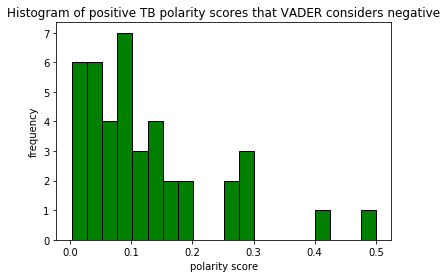

In [36]:
# matplotlib histogram
plt_data = testdata_sample[(testdata_sample.strict_VDR_polarity == 'neg') & (testdata_sample.strict_sent_TB_polarity == 'pos')]

plt.hist(plt_data['strict_sent_mean_TB_score'], color = 'green', edgecolor = 'black', bins=20)

# Add labels
plt.title('Histogram of positive TB polarity scores that VADER considers negative')
plt.xlabel('polarity score')
plt.ylabel('frequency')

plt.show()

TB tends to classify more texts as positive than TextBlob.
Now 35 texts were removed from the sample as conaining only objective sentences.

In [41]:
plt_data[['only_strict_polarity_sents', 
          'strict_VDR_SA_scores_sents', 'mean_strict_VDR_score', 'strict_VDR_polarity',
          'strict_sents_TB_scores', 'strict_sent_mean_TB_score', 'strict_sent_TB_polarity']];

In [37]:
# save data
testdata_sample.to_csv("/Users/alessia/Documents/DataScience/NLP_Project/Outputs/sa_q1_sample_testdata.csv")